Data analysis using Python (Pandas) on HR sample schema - Oracle database 11g by the new python-oracledb API.
<br>This analysis calculates total salaries for each job title and for each department.

To install oralcedb API: 

In [1]:
# !python -m pip install oracledb --upgrade

To install Pandas:

In [2]:
# !pip install pandas

In [3]:
import oracledb
import pandas as pd

To enable thick mode:

In [4]:
oracledb.init_oracle_client()

In [5]:
try:
    conn = oracledb.connect(user="hr", password="hr", dsn="192.168.117.137:1521/orcl")
    print("Connected to Oracle Database, version: ", conn.version)
except:
    print("Connection Failed!")

Connected to Oracle Database, version:  11.2.0.2.0


In [6]:
df=pd.read_sql('select e.first_name, e.last_name, e.salary, j.job_title, d.department_name from employees e left outer join departments d on (e.department_id = d.department_id) join jobs j on (e.job_id = j.job_id) order by e.salary desc, j.job_title, d.department_name', conn)
df.to_excel('emp_salary_by_dept.xlsx', index=False)
df.head()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11056\925937239.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql('select e.first_name, e.last_name, e.salary, j.job_title, d.department_name from employees e left outer join departments d on (e.department_id = d.department_id) join jobs j on (e.job_id = j.job_id) order by e.salary desc, j.job_title, d.department_name', conn)


,FIRST_NAME,LAST_NAME,SALARY,JOB_TITLE,DEPARTMENT_NAME
0,Steven,King,24000.0,President,Executive
1,Neena,Kochhar,17000.0,Administration Vice President,Executive
2,Lex,De Haan,17000.0,Administration Vice President,Executive
3,John,Russell,14000.0,Sales Manager,Sales
4,Karen,Partners,13500.0,Sales Manager,Sales


In [7]:
df.describe()

,SALARY
count,107.000000
mean,6461.682243
std,3909.365746
min,2100.000000
25%,3100.000000
50%,6200.000000
75%,8900.000000
max,24000.000000


Pivot Tables

In [8]:
sal_title = pd.pivot_table(df,index=["JOB_TITLE"], values=["SALARY"], aggfunc="sum").sort_values(by=["SALARY"])
sal_title

,SALARY
JOB_TITLE,
Administration Assistant,4400.0
Marketing Representative,6000.0
Human Resources Representative,6500.0
Public Accountant,8300.0
Public Relations Representative,10000.0
Purchasing Manager,11000.0
Accounting Manager,12000.0
Finance Manager,12000.0
Marketing Manager,13000.0


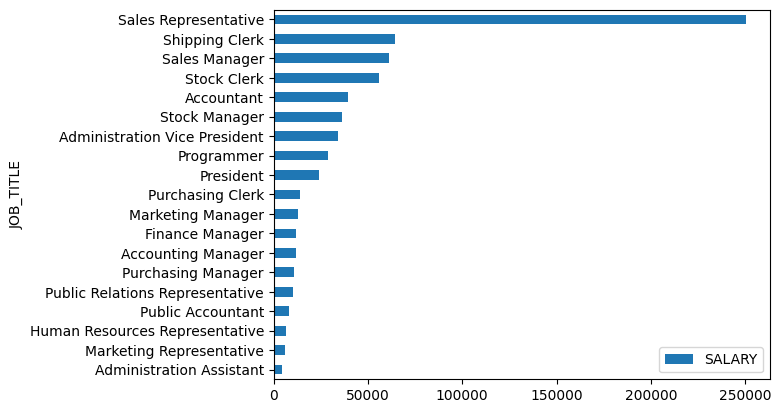

In [9]:
sal_title_bar = sal_title.plot.barh()

In [10]:
sal_dept = pd.pivot_table(df,index=["DEPARTMENT_NAME"], values=["SALARY"], aggfunc="sum").sort_values(by=["SALARY"])
sal_dept

,SALARY
DEPARTMENT_NAME,
Administration,4400.0
Human Resources,6500.0
Public Relations,10000.0
Marketing,19000.0
Accounting,20300.0
Purchasing,24900.0
IT,28800.0
Finance,51600.0
Executive,58000.0


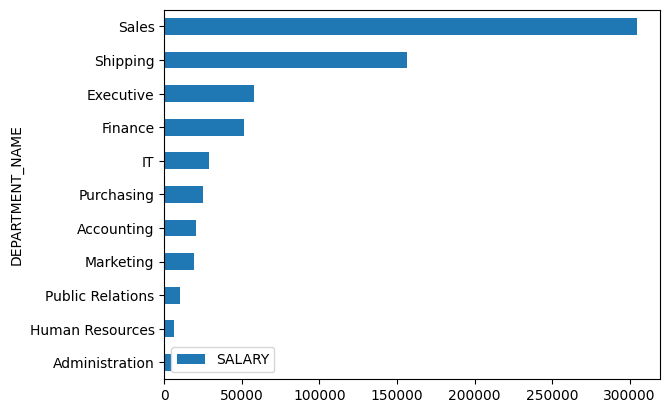

In [11]:
sal_dept_bar = sal_dept.plot.barh()

In [12]:
conn.close()